# Home Advantage Analysis for the EPL and Saudi Pro League Season Level
This Colab is broken into the last 2 parts:
- 3: EPL season analysis (COVID) analysis
- 4: Saudi season analysis (COVID) analysis

## Let's calculate the home advantage for the EPL
- First import pandas and the data

In [ ]:
# import in the packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats


In [ ]:
# download the data
# Download data from dropbox link
epl_home_games_link = 'https://www.dropbox.com/scl/fi/g89w8nhzln6ry9vx3698j/EPL-Home-Games.xlsx?rlkey=qvnyii9aonkm7uq24qs6dby1h&dl=0'
epl_away_games_link = 'https://www.dropbox.com/scl/fi/rwkc5680vy9vehxchgayr/EPL-Away-Games.xlsx?rlkey=a6zw5b7dv2qdc1us8vvripp9b&dl=0'
saudi_home_games_link = 'https://www.dropbox.com/scl/fi/qdfca15xnm2xorv8r16ty/Saudi-Home-Games.xlsx?rlkey=yyb3vd88anz4vhbnyoamnadxb&dl=0'
saudi_away_games_link = 'https://www.dropbox.com/scl/fi/cutm8rosdy5ehc57nu02t/Saudi-Away-Games.xlsx?rlkey=w9p6na3tiogp9h4seep118uau&dl=0'

# Specify the destination filename
epl_home_games_filename = 'EPL-Home-Games.xlsx'
epl_away_games_filename = 'EPL-Away-Games.xlsx'
saudi_home_games_filename = 'Saudi-Home-Games.xlsx'
saudi_away_games_filename = 'Saudi-Away-Games.xlsx'

# Download the file using wget
!wget -O {epl_home_games_filename} {epl_home_games_link}
!wget -O {epl_away_games_filename} {epl_away_games_link}
!wget -O {saudi_home_games_filename} {saudi_home_games_link}
!wget -O {saudi_away_games_filename} {saudi_away_games_link}

# read into a dataframe
epl_home_games_df = pd.read_excel(epl_home_games_filename)
epl_away_games_df = pd.read_excel(epl_away_games_filename)
saudi_home_games_df = pd.read_excel(saudi_home_games_filename)
saudi_away_games_df = pd.read_excel(saudi_away_games_filename)




--2025-08-03 15:31:33--  https://www.dropbox.com/scl/fi/g89w8nhzln6ry9vx3698j/EPL-Home-Games.xlsx?rlkey=qvnyii9aonkm7uq24qs6dby1h
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc46b88b9f8ef48ca0f2f5e8caf9.dl.dropboxusercontent.com/cd/0/inline/Cut2QFlpoJfNmXFUIGImJaEXh4CJ2i-DSGUR_sv5NRJg9sRdPDrgKTK6GlqI3rS8FcmpMhekdoxDX_U0Ps2LmBFPw4l_pKQHJGrdq8T04Sziqe0Iv5FTlFGSeFqMtlKK7_Q/file# [following]
--2025-08-03 15:31:33--  https://uc46b88b9f8ef48ca0f2f5e8caf9.dl.dropboxusercontent.com/cd/0/inline/Cut2QFlpoJfNmXFUIGImJaEXh4CJ2i-DSGUR_sv5NRJg9sRdPDrgKTK6GlqI3rS8FcmpMhekdoxDX_U0Ps2LmBFPw4l_pKQHJGrdq8T04Sziqe0Iv5FTlFGSeFqMtlKK7_Q/file
Resolving uc46b88b9f8ef48ca0f2f5e8caf9.dl.dropboxusercontent.com (uc46b88b9f8ef48ca0f2f5e8caf9.dl.dropboxusercontent.com)... 162.125.8.15, 2620:100:6057:15::a27d:d0f
Connecting to 

# PART 1: EPL Analysis: Initial Counts and Probabilities

In [ ]:
# get the total number of games
total_epl_games = len(epl_home_games_df)
print(f"Total number of games in the EPL: {total_epl_games}")

total_home_wins = len(epl_home_games_df[epl_home_games_df['Games Won *'] == 1])
print(f"Total number of home wins in the EPL: {total_home_wins}")

total_away_wins = len(epl_away_games_df[epl_away_games_df['Games Won *'] == 1])
print(f"Total number of away wins in the EPL: {total_away_wins}")

total_draws = len(epl_home_games_df[epl_home_games_df['Games Drawn *'] == 1])
print(f"Total number of draws in the EPL: {total_draws}")



Total number of games in the EPL: 3420
Total number of home wins in the EPL: 1534
Total number of away wins in the EPL: 1107
Total number of draws in the EPL: 779


In [ ]:
# calculate the home advantage
home_points = (total_home_wins/total_epl_games) * 3 + (total_draws/total_epl_games)
print(f"Home points per game in the EPL: {home_points}")
away_points = (total_away_wins/total_epl_games) * 3 + (total_draws/total_epl_games)
print(f"Away points per game in the EPL: {away_points}")

home_advantage = home_points / (away_points + home_points)

print(f"Home advantage in the EPL: {home_advantage}")

Home points per game in the EPL: 1.5733918128654971
Away points per game in the EPL: 1.1988304093567252
Home advantage in the EPL: 0.567556164961502


# PART 2: Saudi Home vs Away Analysis


In [ ]:
# get the total number of games
total_saudi_games = len(saudi_home_games_df)
print(f"Total number of games in the Saudi League: {total_saudi_games}")

total_home_wins_saudi = len(saudi_home_games_df[saudi_home_games_df['Games Won *'] == 1])
print(f"Total number of home wins in the Saudi League: {total_home_wins_saudi}")

total_away_wins_saudi = len(saudi_away_games_df[saudi_away_games_df['Games Won *'] == 1])
print(f"Total number of away wins in the Saudi League: {total_away_wins_saudi}")

total_draws_saudi = len(saudi_home_games_df[saudi_home_games_df['Games Drawn *'] == 1])
print(f"Total number of draws in the Saudi League: {total_draws_saudi}")

Total number of games in the Saudi League: 2162
Total number of home wins in the Saudi League: 949
Total number of away wins in the Saudi League: 711
Total number of draws in the Saudi League: 502


In [ ]:
# calculate the home advantage
home_points_saudi = (total_home_wins_saudi/total_saudi_games) * 3 + (total_draws_saudi/total_saudi_games)
print(f"Home points per game in the Saudi League: {home_points_saudi}")
away_points_saudi = (total_away_wins_saudi/total_saudi_games) * 3 + (total_draws_saudi/total_saudi_games)
print(f"Away points per game in the Saudi League: {away_points_saudi}")

home_advantage_saudi = home_points_saudi / (away_points_saudi + home_points_saudi)

print(f"Home advantage in the Saudi League: {home_advantage_saudi}")


Home points per game in the Saudi League: 1.5490286771507864
Away points per game in the Saudi League: 1.2187789084181313
Home advantage in the Saudi League: 0.5596590909090909


# PART 3: EPL Season analysis - Do it occur during COVID?


In [ ]:
# Group by season and sum relevant stats
epl_home_totals = epl_home_games_df.groupby('Season')[['Goals', 'Games Won *', 'Games Drawn *', 'Games Lost *']].sum()

# Count how many games per season
home_games_per_season = epl_home_games_df.groupby('Season').size()

# Compute per-game averages
home_season_per_game = epl_home_totals.div(home_games_per_season, axis=0)

# get the points
home_season_per_game['Points'] = home_season_per_game['Games Won *'] * 3 + home_season_per_game['Games Drawn *']

epl_home_avg = epl_home_games_df.groupby('Season')[['Goals', 'Total Shots (inc. Blocks)', 'Passes', 'Corners', 'Yellow Cards', 'Red Cards']].mean()
epl_home_avg


,Goals,Total Shots (inc. Blocks),Passes,Corners,Yellow Cards,Red Cards
Season,,,,,,
2016/17,1.597368,14.071053,446.378947,5.673684,1.760526,0.055263
2017/18,1.531579,13.602632,467.747368,5.747368,1.489474,0.044737
2018/19,1.568421,14.171053,472.984211,5.726316,1.528947,0.047368
2019/20,1.515789,13.326316,461.505263,5.771053,1.592105,0.057895
2020/21,1.352632,12.813158,486.513158,5.536842,1.423684,0.052632
2021/22,1.513158,13.884211,458.402632,5.584211,1.655263,0.052632
2022/23,1.634211,13.973684,455.860526,5.623684,1.676316,0.052632
2023/24,1.800000,15.421053,485.892105,6.123684,1.934211,0.071053
2024/25,1.513158,13.750000,454.847368,5.394737,1.918421,0.068421


In [ ]:
# Group by season and sum relevant stats
epl_away_totals = epl_away_games_df.groupby('Season')[['Goals', 'Games Won *', 'Games Drawn *', 'Games Lost *']].sum()

# Count how many games per season
away_games_per_season = epl_away_games_df.groupby('Season').size()

# Compute per-game averages
away_season_per_game = epl_away_totals.div(away_games_per_season, axis=0)

away_season_per_game['Points'] = away_season_per_game['Games Won *'] * 3 + away_season_per_game['Games Drawn *']

epl_away_avg = epl_away_games_df.groupby('Season')[['Goals', 'Total Shots (inc. Blocks)', 'Passes', 'Corners', 'Yellow Cards', 'Red Cards']].mean()
epl_away_avg.T



Season,2016/17,2017/18,2018/19,2019/20,2020/21,2021/22,2022/23,2023/24,2024/25
Goals,1.202632,1.147368,1.252632,1.205263,1.342105,1.305263,1.218421,1.478947,1.421053
Total Shots (inc. Blocks),11.544737,10.865789,11.178947,11.405263,11.381579,11.765789,11.313158,12.181579,12.171053
Passes,435.313158,438.631579,444.526316,453.678947,458.650000,448.886842,449.818421,455.063158,438.600000
Corners,4.742105,4.544737,4.555263,4.928947,4.613158,4.818421,4.455263,4.694737,4.842105
Yellow Cards,1.902632,1.573684,1.684211,1.778947,1.457895,1.763158,1.939474,2.281579,2.157895
Red Cards,0.052632,0.057895,0.076316,0.057895,0.073684,0.060526,0.026316,0.081579,0.068421


In [ ]:
# recreate table for just the season and home vs away
joint_season_df = pd.DataFrame({'Home Points': home_season_per_game['Points'], 'Away Points': away_season_per_game['Points']})
joint_season_df['Home Goals'] = epl_home_avg['Goals']
joint_season_df['Away Goals'] = epl_away_avg['Goals']
joint_season_df['Total Goals'] = joint_season_df['Home Goals'] + joint_season_df['Away Goals']
joint_season_df['Home Shots'] = epl_home_avg['Total Shots (inc. Blocks)']
joint_season_df['Away Shots'] = epl_away_avg['Total Shots (inc. Blocks)']
joint_season_df['Total Shots'] = joint_season_df['Home Shots'] + joint_season_df['Away Shots']
joint_season_df['Home Passes'] = epl_home_avg['Passes']
joint_season_df['Away Passes'] = epl_away_avg['Passes']
joint_season_df['Total Passes'] = joint_season_df['Home Passes'] + joint_season_df['Away Passes']
joint_season_df.T



Season,2016/17,2017/18,2018/19,2019/20,2020/21,2021/22,2022/23,2023/24,2024/25
Home Points,1.697368,1.626316,1.615789,1.600000,1.355263,1.518421,1.681579,1.597368,1.468421
Away Points,1.081579,1.113158,1.197368,1.157895,1.426316,1.250000,1.089474,1.186842,1.286842
Home Goals,1.597368,1.531579,1.568421,1.515789,1.352632,1.513158,1.634211,1.800000,1.513158
Away Goals,1.202632,1.147368,1.252632,1.205263,1.342105,1.305263,1.218421,1.478947,1.421053
Total Goals,2.800000,2.678947,2.821053,2.721053,2.694737,2.818421,2.852632,3.278947,2.934211
Home Shots,14.071053,13.602632,14.171053,13.326316,12.813158,13.884211,13.973684,15.421053,13.750000
Away Shots,11.544737,10.865789,11.178947,11.405263,11.381579,11.765789,11.313158,12.181579,12.171053
Total Shots,25.615789,24.468421,25.350000,24.731579,24.194737,25.650000,25.286842,27.602632,25.921053
Home Passes,446.378947,467.747368,472.984211,461.505263,486.513158,458.402632,455.860526,485.892105,454.847368
Away Passes,435.313158,438.631579,444.526316,453.678947,458.650000,448.886842,449.818421,455.063158,438.600000


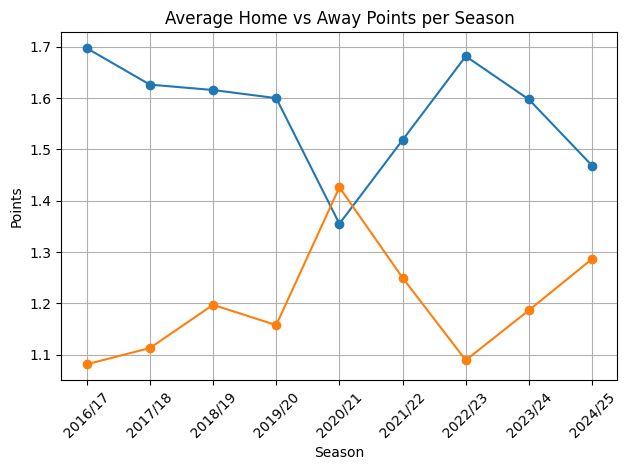

In [ ]:
# create a plot over time - Points
plt.plot(joint_season_df.index, joint_season_df['Home Points'], marker='o', linestyle='-')
plt.plot(joint_season_df.index, joint_season_df['Away Points'], marker='o', linestyle='-')

plt.title('Average Home vs Away Points per Season')
plt.xlabel('Season')
plt.ylabel('Points')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



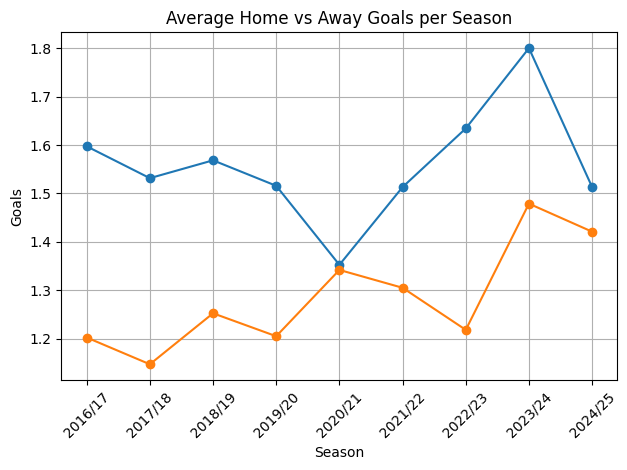

In [ ]:
# create a plot over time - Goals
plt.plot(joint_season_df.index, joint_season_df['Home Goals'], marker='o', linestyle='-')
plt.plot(joint_season_df.index, joint_season_df['Away Goals'], marker='o', linestyle='-')

plt.title('Average Home vs Away Goals per Season')
plt.xlabel('Season')
plt.ylabel('Goals')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


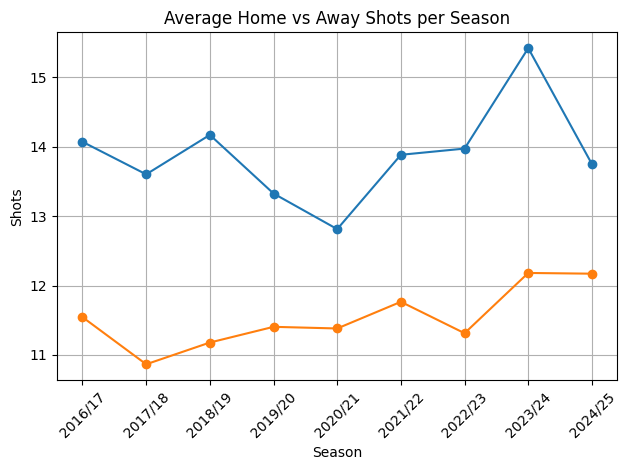

In [ ]:
# create a plot over time - Shots
plt.plot(joint_season_df.index, joint_season_df['Home Shots'], marker='o', linestyle='-')
plt.plot(joint_season_df.index, joint_season_df['Away Shots'], marker='o', linestyle='-')

plt.title('Average Home vs Away Shots per Season')
plt.xlabel('Season')
plt.ylabel('Shots')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

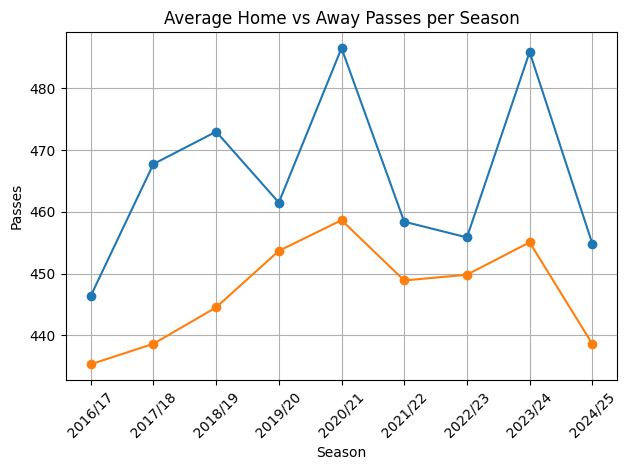

In [ ]:
# create a plot over time - Passes
plt.plot(joint_season_df.index, joint_season_df['Home Passes'], marker='o', linestyle='-')
plt.plot(joint_season_df.index, joint_season_df['Away Passes'], marker='o', linestyle='-')

plt.title('Average Home vs Away Passes per Season')
plt.xlabel('Season')
plt.ylabel('Passes')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# PART 4: Saudi Analysis

In [ ]:
# Group by season and sum relevant stats
saudi_home_totals = saudi_home_games_df.groupby('Season')[['Goals', 'Games Won *', 'Games Drawn *', 'Games Lost *']].sum()

# Count how many games per season
saudi_games_per_season = saudi_home_games_df.groupby('Season').size()

# Compute per-game averages
home_season_per_game_saudi = saudi_home_totals.div(saudi_games_per_season, axis=0)

# get the points
home_season_per_game_saudi['Points'] = home_season_per_game_saudi['Games Won *'] * 3 + home_season_per_game_saudi['Games Drawn *']

saudi_home_avg = saudi_home_games_df.groupby('Season')[['Goals', 'Total Shots (inc. Blocks)', 'Passes', 'Corners', 'Yellow Cards', 'Red Cards']].mean()
saudi_home_avg



,Goals,Total Shots (inc. Blocks),Passes,Corners,Yellow Cards,Red Cards
Season,,,,,,
2016/17,1.648352,13.560440,392.137363,5.439560,1.807692,0.065934
2017/18,1.571429,13.972527,407.445055,5.626374,1.862637,0.043956
2018/19,1.608333,13.383333,396.641667,4.920833,1.954167,0.095833
2019/20,1.604167,12.895833,407.583333,4.979167,2.058333,0.091667
2020/21,1.587500,13.304167,415.633333,5.104167,2.008333,0.116667
2021/22,1.486957,12.404348,395.543478,4.517391,1.921739,0.130435
2022/23,1.453782,11.945378,420.315126,5.037815,1.731092,0.088235
2023/24,1.575163,12.702614,430.336601,4.990196,1.790850,0.104575
2024/25,1.562500,12.927632,424.930921,4.700658,2.009868,0.098684


In [ ]:
# Get the saudi away averages by season




In [ ]:
# recreate table for just the season and home vs away



In [ ]:
# create a plot over season vs Home Points and Away Points


In [ ]:
# create a plot over time with respect to Goals


In [ ]:
# create a plot over seasons with respect to home and away shots


In [ ]:
# create a plot over seasons with respect to home and away passes
